In [23]:
# Import Section
import csv
import codecs
import sys
import io
import numpy as np
import pandas as pd
import scipy as sp
import math

# For Regression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from statistics import mean

from sklearn.linear_model import ElasticNet
from sklearn.kernel_ridge import KernelRidge

# Python script for confusion matrix creation. 
from sklearn.metrics import *
from numpy import mean
from numpy import std
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_excel("Des_cod_1056_92-29.xlsx",index_col=0)

In [3]:
dataset.shape

(1056, 30)

In [4]:
x = dataset.drop(['Act'],axis=1).astype (float)
y = dataset['Act']

In [5]:
x.shape

(1056, 29)

In [6]:
y

Structure
"1Co"       0.853
"2Co"       0.987
"3Co"       0.773
"4Co"       0.760
"5Co"       0.893
            ...  
"1052Co"    0.370
"1053Co"    1.020
"1054Co"    0.832
"1055Co"    0.701
"1056Co"    1.090
Name: Act, Length: 1056, dtype: float64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=.2, random_state = 47, shuffle=True)

In [8]:
X_test.shape

(212, 29)

In [9]:
X_train.shape

(844, 29)

In [10]:
# scealing is required for indepandent variables at ANN
from sklearn.preprocessing import StandardScaler

In [11]:
scale = StandardScaler()

In [12]:
scale.fit(X_train)

StandardScaler()

In [13]:
x_train = scale.fit_transform(X_train)
x_test = scale.fit_transform(X_test)

In [14]:
regressor = ElasticNet(alpha= 0.01, l1_ratio= 0.1, selection='cyclic',max_iter=10000, random_state=0)
  #regressor = KernelRidge(alpha=1.0) 

In [15]:
import time
from datetime import timedelta
start_time = time.monotonic()

In [16]:
 regressor.fit(x_train, y_train)

ElasticNet(alpha=0.01, l1_ratio=0.1, max_iter=10000, random_state=0)

In [17]:
end_time = time.monotonic()
print(timedelta(seconds=end_time - start_time))

0:00:01.141000


In [18]:
# compute the testing accuracy
y_pred = regressor.predict(x_test)

In [19]:
y_pred_train = regressor.predict(x_train)

In [20]:
y_pred_train.shape

(844,)

In [21]:
  print("\n")
  print("overall Performance: ", )



overall Performance: 


In [24]:
  # model evaluation for test set
  mae = metrics.mean_absolute_error(y_test, y_pred)
  mse = metrics.mean_squared_error(y_test, y_pred)
  r2 = metrics.r2_score(y_test, y_pred)
  rmse = round(math.sqrt(mse),4)

In [25]:
print("The model performance for test set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for test set
--------------------------------------
MAE is 0.29709477828581216
MSE is 0.3986
R2 score is 0.39145185089379775


In [26]:
  # model evaluation for training set
maeTrain = metrics.mean_absolute_error(y_train, y_pred_train)
mseTrain = metrics.mean_squared_error(y_train, y_pred_train)
r2Train = metrics.r2_score(y_train, y_pred_train)
rmseTrain = round(math.sqrt(mseTrain),4)

In [27]:
print("The model performance for training set")
print("--------------------------------------")
print('MAE is {}'.format(maeTrain))
print('MSE is {}'.format(rmseTrain))
print('R2 score is {}'.format(r2Train))

The model performance for training set
--------------------------------------
MAE is 0.29171155203595817
MSE is 0.388
R2 score is 0.3481719649796471


In [28]:
cvscoretrain = (cross_val_score(regressor,x_train,y_train.ravel(),cv=5).mean())

In [29]:
print("The CV score for training set")
print("--------------------------------------")
print (cross_val_score(regressor,x_train,y_train.ravel(),cv=5))
print('Q2 is {}'.format(cvscoretrain))

The CV score for training set
--------------------------------------
[0.3122123  0.23466574 0.32801899 0.28073044 0.29121154]
Q2 is 0.28936780281707614


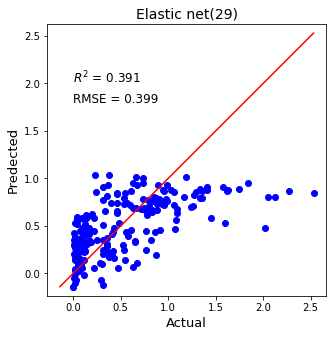

In [30]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, c='blue', marker='o')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'red')
plt.xlabel('Actual', fontsize=13)
plt.ylabel('Predected', fontsize=13)
plt.axis('equal')
plt.text(0, 2, '$R^2$ = 0.391', fontsize = 12)
plt.text(0, 1.8, 'RMSE = 0.399', fontsize = 12)
plt.title('Elastic net(29)', fontsize = 14)
plt.show()

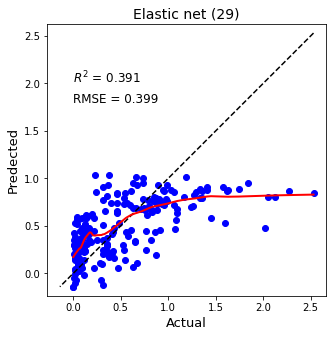

In [31]:
import statsmodels.api as sm
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, c='blue', marker='o', linewidth=1)
plt.yscale('linear')
plt.xscale('linear')


p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], c='black', linestyle='dashed')
plt.xlabel('Actual', fontsize=13)
plt.ylabel('Predected', fontsize=13)
plt.axis('equal')
plt.text(0, 2, '$R^2$ = 0.391', fontsize = 12)
plt.text(0, 1.8, 'RMSE = 0.399', fontsize = 12)
plt.title('Elastic net (29)', fontsize = 14)

# Draw a Loess best-fit line over the scatter plot
lowess = sm.nonparametric.lowess
loess_fit = lowess(y_pred, y_test, frac=0.3)
# Plot the loess fit line on the scatter plot
plt.plot(loess_fit[:, 0], loess_fit[:, 1], 'r-', linewidth=2)

plt.show()

In [29]:
import seaborn as sns

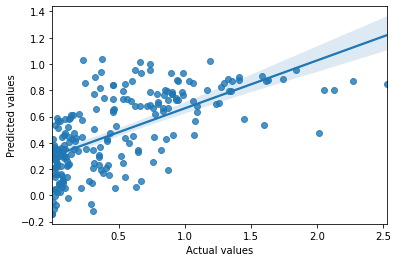

In [32]:
sns.regplot(x=y_test, y=y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

In [29]:
#Randomize search CV
from sklearn.model_selection import RandomizedSearchCV

In [30]:
# creatting parameter gride
param_grid_regressor= {'alpha':[0.00005,0.0005,0.001, 0.01, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100],
             'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,1],'selection':['cyclic', 'random'] } 

In [32]:
regressor_random = RandomizedSearchCV(estimator = regressor, param_distributions=param_grid_regressor, n_iter = 100,
                              cv = 5, verbose =2,
                              n_jobs= -1, scoring ="neg_mean_squared_error" )

In [33]:
regressor_random.fit (x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=ElasticNet(alpha=0.06, l1_ratio=1, max_iter=10000,
                                        random_state=0, selection='random'),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': [5e-05, 0.0005, 0.001, 0.01,
                                                  0.05, 0.06, 0.08, 1, 2, 3, 5,
                                                  8, 10, 20, 50, 100],
                                        'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                     0.6, 0.7, 0.8, 1],
                                        'selection': ['cyclic', 'random']},
                   scoring='neg_mean_squared_error', verbose=2)

In [34]:
regressor_random.best_params_

{'selection': 'cyclic', 'l1_ratio': 0.1, 'alpha': 0.01}

In [35]:
regressor_random.best_score_

-0.16538000602641617

In [36]:
# parameter tuning grid searchCV
from sklearn.model_selection import GridSearchCV

In [38]:
# creatting parameter gride
param_grid_regressor= {'alpha':[0.0005,0.001, 0.01, 0.05, 0.06, 0.08, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
             'l1_ratio':[0.001, 0.002, 0.003, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,1],'selection':['cyclic', 'random'] } 

In [40]:
regressor_grid = GridSearchCV(estimator =regressor, param_grid=param_grid_regressor,
                              cv = 5, verbose =2,
                              n_jobs= -1,  scoring = "neg_mean_squared_error")

regressor_grid.fit (x_train,y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


GridSearchCV(cv=5,
             estimator=ElasticNet(alpha=0.06, l1_ratio=1, max_iter=10000,
                                  random_state=0, selection='random'),
             n_jobs=-1,
             param_grid={'alpha': [0.0005, 0.001, 0.01, 0.05, 0.06, 0.08, 0.1,
                                   0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                         'l1_ratio': [0.001, 0.002, 0.003, 0.1, 0.2, 0.3, 0.4,
                                      0.5, 0.6, 0.7, 0.8, 1],
                         'selection': ['cyclic', 'random']},
             scoring='neg_mean_squared_error', verbose=2)

In [41]:
regressor_grid.best_params_

{'alpha': 0.01, 'l1_ratio': 0.1, 'selection': 'cyclic'}

In [42]:
regressor_grid.best_score_

-0.16538000602641617